In [2]:
import pandas as pd
from pathlib import Path
from glob import glob
import numpy as np
from datetime import datetime,timedelta
from tqdm.notebook import tqdm
import pynmea2

In [2]:
work_dir = Path.cwd() # set path to current working directory

In [3]:
files_list = glob(r'/media/beth/Transcend/Eurec4a_master/Caravela/CaravelaPCS/Datalog/Y20/*/*'+ '/group1*')  
files_list.sort()

li = []

for filename in tqdm(files_list):
    df = pd.read_csv(filename)
    li.append(df)

sl = pd.concat(li, axis=0)

In [4]:
subset = pd.DataFrame()
subset['datetime'] = (sl['Date'].astype(str) +' '+ sl['Time'])
subset['heading'] = sl['U5_??HPR_F1']
subset['pitch'] = sl['U5_??HPR_F2']
subset['roll'] = sl['U5_??HPR_F3']
subset = subset.reset_index()

In [5]:
subset.head()

,index,datetime,heading,pitch,roll
0,0,200115 12:02:42,0.0,0.0,0.0
1,1,200115 12:02:42,0.0,0.0,0.0
2,2,200115 12:02:42,0.0,0.0,0.0
3,3,200115 12:02:42,0.0,0.0,0.0
4,4,200115 12:02:42,0.0,0.0,0.0


In [6]:
dt = []
for i in tqdm(range(0, 20000000)):
    dt.append(datetime.strptime(subset['datetime'][i], '%y%m%d %H:%M:%S').isoformat())
for i in tqdm(range(20000000, len(subset['datetime']))):
    dt.append(datetime.strptime(subset['datetime'][i], '%y%m%d %H:%M:%S').isoformat())
subset['datetime UTC'] = dt

In [7]:
subset.head()

,index,datetime,heading,pitch,roll,datetime UTC
0,0,200115 12:02:42,0.0,0.0,0.0,2020-01-15T12:02:42
1,1,200115 12:02:42,0.0,0.0,0.0,2020-01-15T12:02:42
2,2,200115 12:02:42,0.0,0.0,0.0,2020-01-15T12:02:42
3,3,200115 12:02:42,0.0,0.0,0.0,2020-01-15T12:02:42
4,4,200115 12:02:42,0.0,0.0,0.0,2020-01-15T12:02:42


In [8]:
subset = subset.drop(['index'],axis=1)

In [9]:
subset = subset.drop(['datetime'],axis=1)

In [11]:
subset = subset[(subset['datetime UTC'] >= '2020-01-22 00:00:00.000')] #select data from Caravela's launch onwards
subset

,heading,pitch,roll,datetime UTC
259171,0.0,0.0,0.0,2020-01-22T12:04:48
259172,0.0,0.0,0.0,2020-01-22T12:04:48
259173,0.0,0.0,0.0,2020-01-22T12:04:48
259174,0.0,0.0,0.0,2020-01-22T12:04:48
259175,0.0,0.0,0.0,2020-01-22T12:04:48
...,...,...,...,...
28779592,89.7,3.4,-0.9,2020-02-24T17:36:06
28779593,89.7,3.4,-0.9,2020-02-24T17:36:06
28779594,89.7,3.4,-0.9,2020-02-24T17:36:06
28779595,89.7,3.4,-0.9,2020-02-24T17:36:06


In [12]:
subset.to_csv('../../Products/CARAVELA_Motion.csv',index = None)

In [3]:
baa = pd.read_csv('../../Products/CARAVELA_Motion.csv')# import file to test it

In [4]:
x=[]
for i in tqdm(range(len(baa['datetime UTC']))):
    x.append(datetime.fromisoformat(baa['datetime UTC'][i]))
baa['datetime_parsed'] = x

In [5]:
baa

,heading,pitch,roll,datetime UTC,datetime_parsed
0,0.0,0.0,0.0,2020-01-22T12:04:48,2020-01-22 12:04:48
1,0.0,0.0,0.0,2020-01-22T12:04:48,2020-01-22 12:04:48
2,0.0,0.0,0.0,2020-01-22T12:04:48,2020-01-22 12:04:48
3,0.0,0.0,0.0,2020-01-22T12:04:48,2020-01-22 12:04:48
4,0.0,0.0,0.0,2020-01-22T12:04:48,2020-01-22 12:04:48
...,...,...,...,...,...
28520421,89.7,3.4,-0.9,2020-02-24T17:36:06,2020-02-24 17:36:06
28520422,89.7,3.4,-0.9,2020-02-24T17:36:06,2020-02-24 17:36:06
28520423,89.7,3.4,-0.9,2020-02-24T17:36:06,2020-02-24 17:36:06
28520424,89.7,3.4,-0.9,2020-02-24T17:36:06,2020-02-24 17:36:06


In [6]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Datetime')

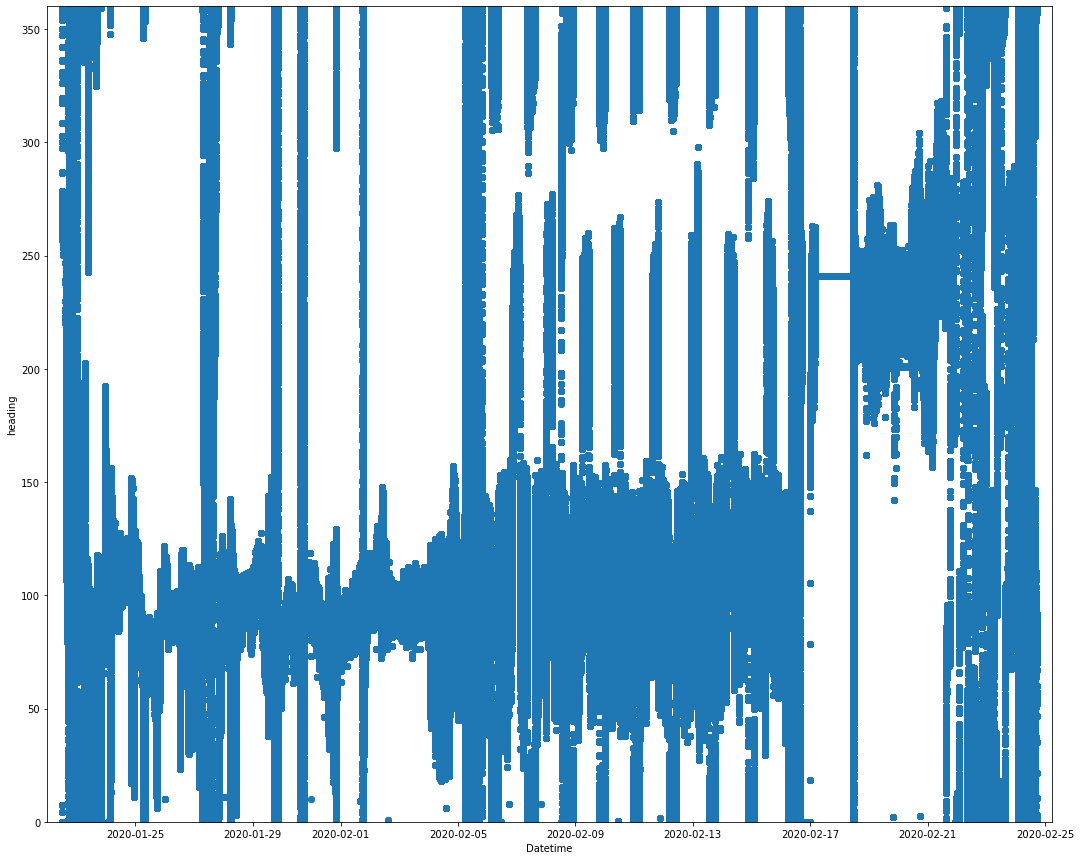

In [7]:
a = (baa.datetime_parsed.min() - timedelta(seconds = 3600*12))
b = (baa.datetime_parsed.max() + timedelta(seconds = 3600*12))

fig,ax = plt.subplots(1,1, figsize=(18, 15))
ax.set_xlim(a,b)
ax.set_ylim(0,360)
ax.scatter(baa['datetime_parsed'], baa['heading'])
ax.set_ylabel('heading')
ax.set_xlabel('Datetime')